In [1]:
from all_formulas import *
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import ParameterGrid
import pandas as pd

In [2]:
b = 7.61
init = [1,0]
a0 = 3
q0 = 1-1e-6
n = 1
tim = 5
q1 = 1-3e-6
T = 5

In [3]:
a1_values = [7.76, 8.07]
m_values = [10000,12000,20000]
times_treatment = [0,5]

param_dict = {'a1':a1_values, 'm':m_values, 'time_tr':times_treatment}
param_grid = list(ParameterGrid(param_dict))

In [4]:
with open('paramgrid_Y_vs_n.txt', 'wb') as f:
    pickle.dump(param_grid, f)

In [5]:
u_vals_short = np.logspace(-6,-3,50)
u_vals_long = np.logspace(-6,-3,1000)

In [6]:
def find_nearest_value(array):
    differences = np.array(array) - array[0]
    return(np.searchsorted(-differences, 0))

In [7]:
all_results_analytical = {}

for p in range(len(param_grid)):
    a1val = param_grid[p]['a1']
    mval = param_grid[p]['m']
    ttrval = param_grid[p]['time_tr']
    
    if ttrval == 0:
        Yvsu1 = [totalY_wholeinfection(T, b, a0, a1val, 1-u1, 1-u1, mval, n) for u1 in u_vals_long]
    elif ttrval == 5:
        Yvsu1 = [totalY_wholeinfection(T, b, a0, a1val, q0, 1-u1, mval, n) for u1 in u_vals_long]

    all_results_analytical[p] = Yvsu1

In [8]:
indices_plot_peak = {(0,0):1, (0,1):5, (1,0):7, (1,1):11}
indices_plot_exposure = {(0,0):0, (0,1):4, (1,0):6, (1,1):10}

### 1) Plot treatment at peak

In [9]:
condition = (np.log(u_vals_long/1e-6)/(b*1e-6*(u_vals_long/1e-6))) - 10000
u_condition = np.searchsorted(condition, 0)

In [10]:
u_condition

12

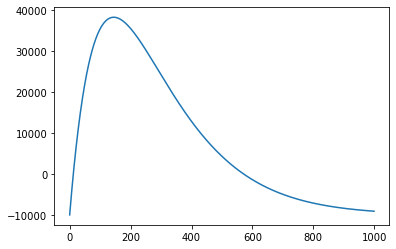

In [11]:
plt.plot(condition)

(0, 0) {'a1': 7.76, 'm': 10000, 'time_tr': 5}
(0, 1) {'a1': 7.76, 'm': 20000, 'time_tr': 5}
(1, 0) {'a1': 8.07, 'm': 10000, 'time_tr': 5}
(1, 1) {'a1': 8.07, 'm': 20000, 'time_tr': 5}


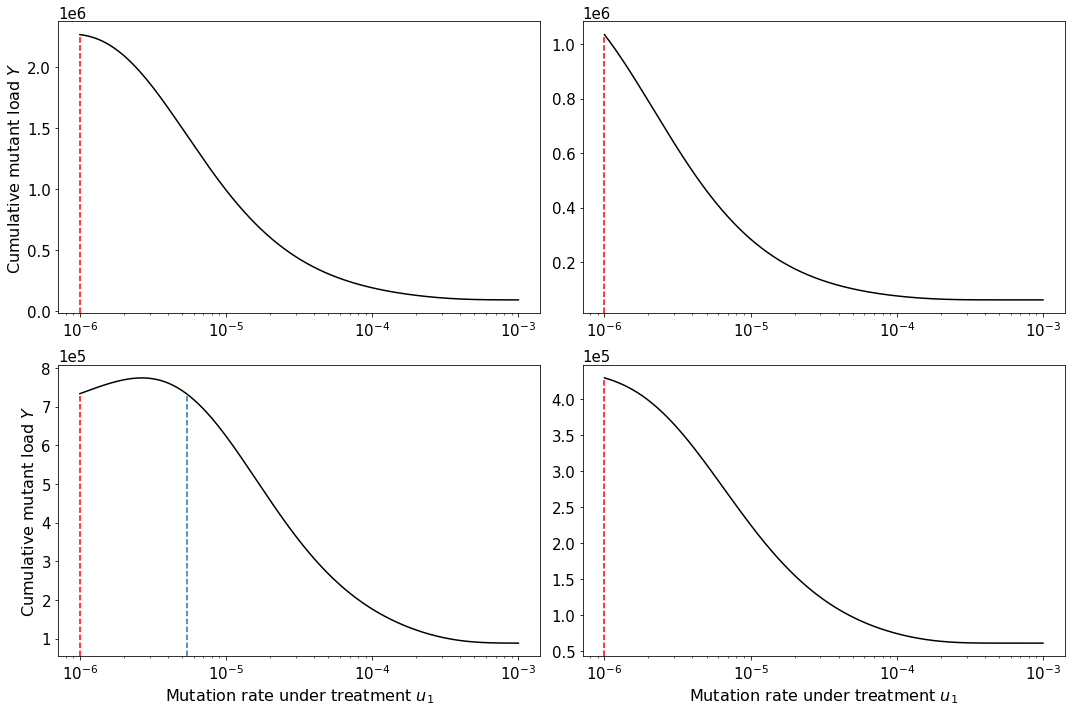

In [14]:
fig, ax = plt.subplots(2,2,figsize = (15,10))

for ind in indices_plot_peak:
    print(ind, param_grid[indices_plot_peak[ind]])
    
    Y_to_plot = all_results_analytical[indices_plot_peak[ind]]
    
    ax[ind].plot(u_vals_long, Y_to_plot, c ='k')
    ax[ind].set_xscale('log')
    ax[ind].tick_params(labelsize = 15)
    ax[ind].yaxis.offsetText.set_fontsize(15)
    ax[ind].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

    nearest_value_immediate = find_nearest_value(Y_to_plot)
    ylim_coor = ax[ind].get_ylim()
    ax[ind].axvline(1e-6, ymax = (Y_to_plot[0]-ylim_coor[0])/(ylim_coor[1]-ylim_coor[0]), c='r', linestyle='dashed')
    
    if nearest_value_immediate > 0:
        ax[ind].axvline(u_vals_long[nearest_value_immediate], ymax = (Y_to_plot[nearest_value_immediate]-ylim_coor[0])/(ylim_coor[1]-ylim_coor[0]), c='C0',linestyle='dashed')

for i in range(2):
    ax[1,i].set_xlabel('Mutation rate under treatment $u_1$', fontsize = 16)
    ax[i,0].set_ylabel('Cumulative mutant load $Y$', fontsize = 16)


plt.tight_layout()
plt.savefig('Figure_Y_vs_u1_peak_FEB10.jpg', dpi = 400, bbox_inches = 'tight')

### 2) Plot treatment exposure

(0, 0) {'a1': 7.76, 'm': 10000, 'time_tr': 0}
(0, 1) {'a1': 7.76, 'm': 20000, 'time_tr': 0}
(1, 0) {'a1': 8.07, 'm': 10000, 'time_tr': 0}
(1, 1) {'a1': 8.07, 'm': 20000, 'time_tr': 0}


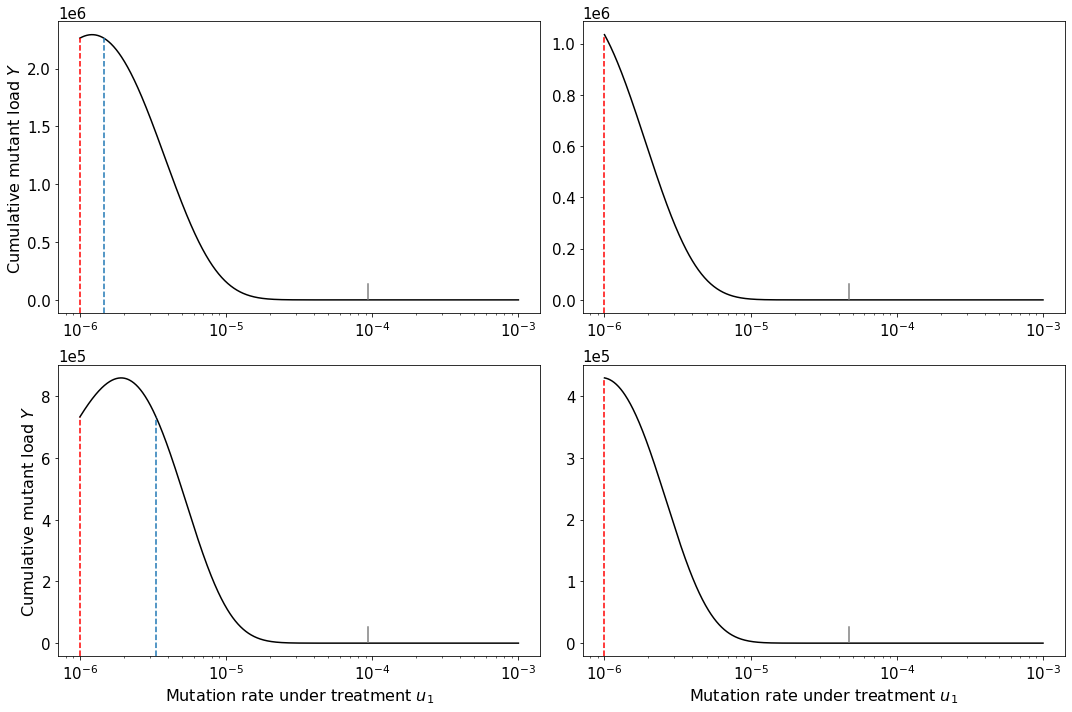

In [17]:
fig, ax = plt.subplots(2,2,figsize = (15,10))

for ind in indices_plot_exposure:
    
    print(ind, param_grid[indices_plot_exposure[ind]])
    
    Y_to_plot = all_results_analytical[indices_plot_exposure[ind]]
    
    ax[ind].plot(u_vals_long, Y_to_plot, c ='k')
    ax[ind].set_xscale('log')
    ax[ind].tick_params(labelsize = 15)
    ax[ind].yaxis.offsetText.set_fontsize(15)

    nearest_value_immediate = find_nearest_value(Y_to_plot)
    ylim_coor = ax[ind].get_ylim()
    ax[ind].axvline(1e-6, ymax = (Y_to_plot[0]-ylim_coor[0])/(ylim_coor[1]-ylim_coor[0]), c='r', linestyle='dashed')
    ax[ind].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    if nearest_value_immediate > 0:
        ax[ind].axvline(u_vals_long[nearest_value_immediate], ymax = (Y_to_plot[nearest_value_immediate]-ylim_coor[0])/(ylim_coor[1]-ylim_coor[0]), c='C0',linestyle='dashed')

    error_threshold = np.searchsorted(-b*(1-u_vals_long)**param_grid[indices_plot_exposure[ind]]['m'] + a0, 0)
    ax[ind].axvline(u_vals_long[error_threshold], ymax = 0.1, ymin = 0.05, c = 'grey')
    
    
for i in range(2):
    ax[1,i].set_xlabel('Mutation rate under treatment $u_1$', fontsize = 16)
    ax[i,0].set_ylabel('Cumulative mutant load $Y$', fontsize = 16)
    condition_10000 = (np.log(u_vals_long/1e-6)/(b*1e-6*(u_vals_long/1e-6))) - 10000
    u_condition_10000 = np.searchsorted(condition_10000, 0)
    #ax[i,0].axvline(u_vals_long[u_condition_10000])

plt.tight_layout()
plt.savefig('Figure_Y_vs_u1_exposure_FEB10.jpg', dpi = 400, bbox_inches = 'tight')

In [1]:
7.61*5

38.050000000000004